In [4]:
!pip install lazypredict
!pip install lime


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.ensemble import *
from sklearn.metrics import *
import lime.lime_tabular
from imblearn.over_sampling import SMOTE
from collections import Counter

In [6]:
df=pd.read_csv("data_file.csv")
df.head()

,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll,79755c51e413ed3c6be4635fd729a6e1,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
1,05c8318f98a5d301d80000009c316005.vertdll.dll,95e19f3657d34a432eada93221b0ea16,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
2,06054fba-5619-4a86-a861-ffb0464bef5d.dll,85c32641d77a54e19ba8ea4ab305c791,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
3,075822ac99a5d301660400009c316005.adhapi.dll,62e3b959d982ef534b66f819fe15f085,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,090607dd9ba5d301ca0900009c316005.SensorsNative...,ae38c5f7d313ad0ff3bfb8826476767f,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1


In [7]:
df.describe()

,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
count,62485.00,62485.00,62485.00,62485.00,62485.00,62485.00,62485.00,62485.00,62485.00,62485.00,62485.00,62485.00,62485.00,62485.00,62485.00,62485.00
mean,6756.47,25870.48,154161.11,58.79,5.42,895318.63,409462.35,146631.14,9.78,6.61,4.75,875983.04,12966.03,184466.39,0.02,0.43
std,13345.50,6461396.27,1903142.50,1114.07,2.54,37795267.34,28518203.46,1124629.73,9.05,16.98,2.14,628818.94,15762.73,17326246.56,0.13,0.50
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,332.00,0.00,0.00,0.00,4.00,0.00,0.00,4096.00,6.00,0.00,3.00,262144.00,0.00,1080.00,0.00,0.00
50%,332.00,0.00,0.00,0.00,5.00,0.00,0.00,8520.00,9.00,0.00,5.00,1048576.00,320.00,2496.00,0.00,0.00
75%,332.00,28.00,12832.00,6.00,6.00,28752.00,104.00,65536.00,11.00,10.00,6.00,1048576.00,32768.00,23504.00,0.00,1.00
max,43620.00,1615155235.00,285212672.00,63325.00,260.00,2147483648.00,2415919104.00,66154496.00,255.00,255.00,33.00,16777216.00,58632.00,4294942044.00,1.00,1.00


In [8]:
df.isnull().sum()

FileName              0
md5Hash               0
Machine               0
DebugSize             0
DebugRVA              0
MajorImageVersion     0
MajorOSVersion        0
ExportRVA             0
ExportSize            0
IatVRA                0
MajorLinkerVersion    0
MinorLinkerVersion    0
NumberOfSections      0
SizeOfStackReserve    0
DllCharacteristics    0
ResourceSize          0
BitcoinAddresses      0
Benign                0
dtype: int64

In [9]:
df.Benign.value_counts()

Benign
0    35367
1    27118
Name: count, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62485 entries, 0 to 62484
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FileName            62485 non-null  object
 1   md5Hash             62485 non-null  object
 2   Machine             62485 non-null  int64 
 3   DebugSize           62485 non-null  int64 
 4   DebugRVA            62485 non-null  int64 
 5   MajorImageVersion   62485 non-null  int64 
 6   MajorOSVersion      62485 non-null  int64 
 7   ExportRVA           62485 non-null  int64 
 8   ExportSize          62485 non-null  int64 
 9   IatVRA              62485 non-null  int64 
 10  MajorLinkerVersion  62485 non-null  int64 
 11  MinorLinkerVersion  62485 non-null  int64 
 12  NumberOfSections    62485 non-null  int64 
 13  SizeOfStackReserve  62485 non-null  int64 
 14  DllCharacteristics  62485 non-null  int64 
 15  ResourceSize        62485 non-null  int64 
 16  BitcoinAddresses    62

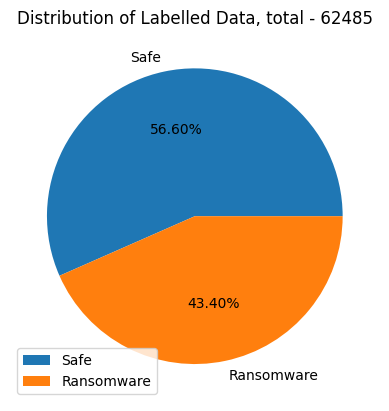

In [11]:
plt.pie(df.Benign.value_counts().values.tolist(), labels=['Safe','Ransomware'], autopct='%.2f%%')
plt.legend()
plt.title(f"Distribution of Labelled Data, total - {len(df)}")
plt.show()

In [12]:
df.head()

,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll,79755c51e413ed3c6be4635fd729a6e1,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
1,05c8318f98a5d301d80000009c316005.vertdll.dll,95e19f3657d34a432eada93221b0ea16,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
2,06054fba-5619-4a86-a861-ffb0464bef5d.dll,85c32641d77a54e19ba8ea4ab305c791,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
3,075822ac99a5d301660400009c316005.adhapi.dll,62e3b959d982ef534b66f819fe15f085,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,090607dd9ba5d301ca0900009c316005.SensorsNative...,ae38c5f7d313ad0ff3bfb8826476767f,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1


In [13]:
df.md5Hash.nunique()

62485

In [14]:
df.md5Hash.isnull().sum()

0

In [15]:
df.head()

,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll,79755c51e413ed3c6be4635fd729a6e1,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
1,05c8318f98a5d301d80000009c316005.vertdll.dll,95e19f3657d34a432eada93221b0ea16,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
2,06054fba-5619-4a86-a861-ffb0464bef5d.dll,85c32641d77a54e19ba8ea4ab305c791,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
3,075822ac99a5d301660400009c316005.adhapi.dll,62e3b959d982ef534b66f819fe15f085,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,090607dd9ba5d301ca0900009c316005.SensorsNative...,ae38c5f7d313ad0ff3bfb8826476767f,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1


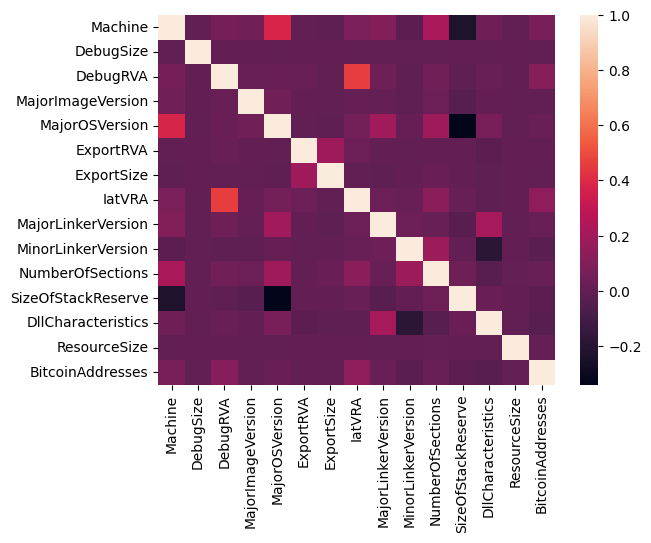

In [16]:
sns.heatmap(df.drop(['FileName','md5Hash','Benign'], axis=1).corr())
plt.show()

In [17]:
corr_matrix = df.drop(['FileName','md5Hash','Benign'], axis=1).corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print(to_drop)

[]


In [18]:
df.drop(to_drop, axis=1, inplace=True)

<Axes: >

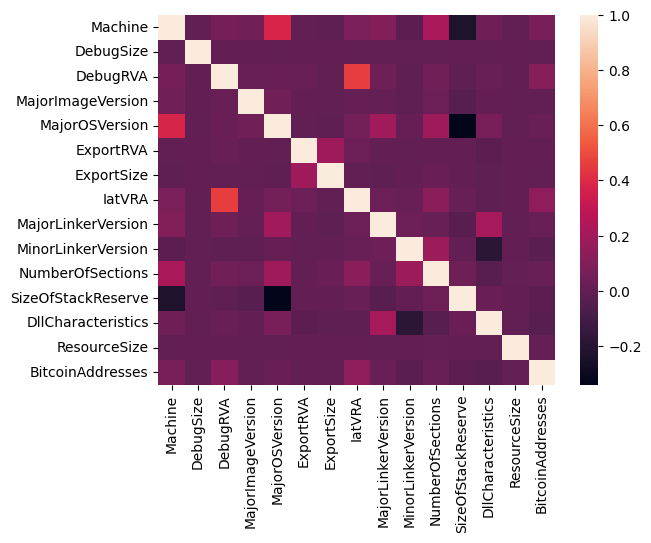

In [19]:
sns.heatmap(df.drop(['FileName','md5Hash','Benign'], axis=1).corr())

In [20]:
def iv_woe(data, target, bins=10, show_woe=False):
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()

    #Extract Column Names
    cols = data.columns

    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [21]:
df.Benign.dtypes

dtype('int64')

In [22]:
iv, woe = iv_woe(df.drop(['FileName','md5Hash'],axis=1), 'Benign')

Information value of Machine is 3.836388
Information value of DebugSize is 3.631785
Information value of DebugRVA is 2.018239
Information value of MajorImageVersion is 1.000609
Information value of MajorOSVersion is 2.320144
Information value of ExportRVA is 0.578911
Information value of ExportSize is 0.941623
Information value of IatVRA is 0.710278
Information value of MajorLinkerVersion is 3.899621
Information value of MinorLinkerVersion is 1.088247
Information value of NumberOfSections is 0.291686
Information value of SizeOfStackReserve is 1.280688
Information value of DllCharacteristics is 3.279573
Information value of ResourceSize is 2.083902
Information value of BitcoinAddresses is 0.01225


In [23]:
iv.sort_values(by = 'IV', ascending=False)

,Variable,IV
0,MajorLinkerVersion,3.90
0,Machine,3.84
0,DebugSize,3.63
0,DllCharacteristics,3.28
0,MajorOSVersion,2.32
0,ResourceSize,2.08
0,DebugRVA,2.02
0,SizeOfStackReserve,1.28
0,MinorLinkerVersion,1.09
0,MajorImageVersion,1.00


In [24]:
thresh = 1
res = len(iv)-len(iv[iv['IV']>thresh])
print(res)

5


In [25]:
features = iv.sort_values(by = 'IV', ascending=False)['Variable'][:res].values.tolist()
print(features,'\n')
print('Total number of features-\n',len(features))

['MajorLinkerVersion', 'Machine', 'DebugSize', 'DllCharacteristics', 'MajorOSVersion'] 

Total number of features-
 5


In [26]:
X = df[features]
y = df['Benign']

In [27]:
randomseed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=randomseed)

In [28]:
print(X_test.shape[0] + X_train.shape[0])
print('Training labels shape:', y_train.shape)
print('Test labels shape:', y_test.shape)
print('Training features shape:', X_train.shape)
print('Test features shape:', X_test.shape)

62485
Training labels shape: (43739,)
Test labels shape: (18746,)
Training features shape: (43739, 5)
Test features shape: (18746, 5)


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [30]:
models = {
    "Random Forest": RandomForestClassifier(random_state=randomseed),
    "Support Vector Machine": SVC(random_state=randomseed),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

accuracies = {}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.3f}")

best_model = max(accuracies, key=accuracies.get)
print(f"\nBest Model: {best_model} with Accuracy: {accuracies[best_model]:.3f}")

Random Forest Accuracy: 0.986
Support Vector Machine Accuracy: 0.570
K-Nearest Neighbors Accuracy: 0.985

Best Model: Random Forest with Accuracy: 0.986


In [31]:
model = RandomForestClassifier(random_state=randomseed)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [32]:
pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)

pred_proba = np.array([prob[1] for prob in pred_proba])

In [33]:
import pickle
MODEL_PATH = "model.pkl"
with open(MODEL_PATH, "wb") as file:
    pickle.dump(model, file)

In [34]:
cm = confusion_matrix(y_test,pred)
cm

array([[10536,   142],
       [  113,  7955]], dtype=int64)

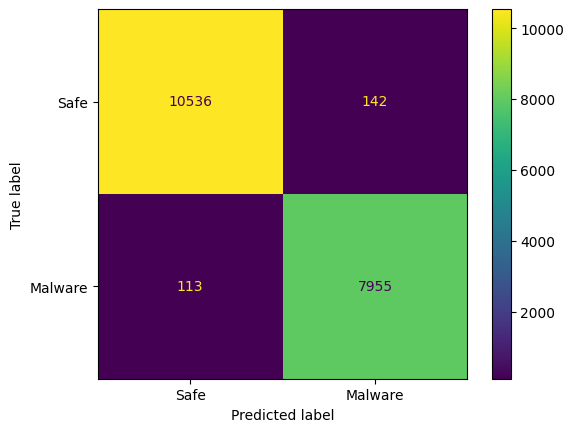

In [35]:
classes = ['Safe', 'Malware']

cmd = ConfusionMatrixDisplay(cm, display_labels=classes)
cmd.plot()
plt.show()

In [36]:
TP = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
TN = cm[0, 0]

In [37]:
accuracy = (TP + TN) / (TP + TN + FP + FN)

precision = TP / (TP + FP)

recall = TP / (TP + FN)

f1 = 2 * (precision * recall) / (precision + recall)

mcc = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

fpr = FP / (FP + TN)

auc = roc_auc_score(y_test, pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"MCC: {mcc:.4f}")
print(f"False Positive Rate: {fpr:.4f}")
print(f"AUC Score: {auc:.4f}")

Accuracy: 0.9864
Precision: 0.9825
Recall: 0.9860
F1 Score: 0.9842
MCC: 0.9723
False Positive Rate: 0.0133
AUC Score: 0.9978
